In [1]:
# import Liabries
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

# Load the data
df = pd.read_csv('telcom_data1.csv')


In [2]:
df

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,1.310000e+19,04-04-19 12:01,770.0,4/25/2019 14:35,662.0,1823652.0,2.082010e+14,3.366496e+10,3.552120e+13,9.16E+15,...,15854611.0,2501332.00,8198936.00,9656251.00,278082303.0,1.434415e+07,171744450.0,8.814393e+06,36749741.0,308879636.0
1,1.310000e+19,04-09-19 13:04,235.0,4/25/2019 8:15,606.0,1365104.0,2.082020e+14,3.368185e+10,3.579400e+13,L77566A,...,20247395.0,19111729.00,18338413.00,17227132.00,608750074.0,1.170709e+06,526904238.0,1.505514e+07,53800391.0,653384965.0
2,1.310000e+19,04-09-19 17:42,1.0,4/25/2019 11:58,652.0,1361762.0,2.082000e+14,3.376063e+10,3.528150e+13,D42335A,...,19725661.0,14699576.00,17587794.00,6163408.00,229584621.0,3.956300e+05,410692588.0,4.215763e+06,27883638.0,279807335.0
3,1.310000e+19,04-10-19 0:31,486.0,4/25/2019 7:36,171.0,1321509.0,2.082010e+14,3.375034e+10,3.535660e+13,T21824A,...,21388122.0,15146643.00,13994646.00,1097942.00,799538153.0,1.084972e+07,749039933.0,1.279728e+07,43324218.0,846028530.0
4,1.310000e+19,04-12-19 20:10,565.0,4/25/2019 10:40,954.0,1089009.0,2.082010e+14,3.369980e+10,3.540700e+13,D88865A,...,15259380.0,18962873.00,17124581.00,415218.00,527707248.0,3.529801e+06,550709500.0,1.391032e+07,38542814.0,569138589.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149996,7.280000e+18,4/29/2019 7:28,451.0,4/30/2019 6:02,214.0,81230.0,2.082020e+14,3.365069e+10,3.548310e+13,D20434A,...,16191667.0,11763428.00,17883703.00,19678161.00,526609673.0,9.197207e+06,3264510.0,1.348742e+07,57628851.0,574175259.0
149997,7.350000e+18,4/29/2019 7:28,483.0,4/30/2019 10:41,187.0,97970.0,2.082020e+14,3.366345e+10,3.566050e+13,D10223C,...,13877234.0,8288284.00,19350146.00,21293148.00,626893062.0,4.735033e+06,712180387.0,2.457758e+06,39135081.0,666648844.0
149998,1.310000e+19,4/29/2019 7:28,283.0,4/30/2019 10:46,810.0,98249.0,2.082020e+14,3.362189e+10,3.572120e+13,T51102A,...,22660510.0,1855903.00,9963942.00,5065760.00,553539484.0,1.339432e+07,121100856.0,1.131473e+07,34912224.0,592786405.0
149999,1.310000e+19,4/29/2019 7:28,696.0,4/30/2019 10:40,327.0,97910.0,2.082020e+14,3.361962e+10,8.618620e+13,L88342B,...,8817106.0,8305402.00,3322253.00,13172589.00,352536971.0,2.529475e+06,814713113.0,1.406930e+06,29626096.0,371895920.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150001 entries, 0 to 150000
Data columns (total 55 columns):
 #   Column                                    Non-Null Count   Dtype  
---  ------                                    --------------   -----  
 0   Bearer Id                                 149010 non-null  float64
 1   Start                                     150000 non-null  object 
 2   Start ms                                  150000 non-null  float64
 3   End                                       150000 non-null  object 
 4   End ms                                    150000 non-null  float64
 5   Dur. (ms)                                 150000 non-null  float64
 6   IMSI                                      149431 non-null  float64
 7   MSISDN/Number                             148935 non-null  float64
 8   IMEI                                      149429 non-null  float64
 9   Last Location Name                        148848 non-null  object 
 10  Avg RTT DL (ms)     

In [4]:
#Calculate the engagement metrics
df['sessions_frequency'] = df.groupby('MSISDN/Number')['Bearer Id'].transform('count')
df['duration_of_session'] = df['Dur. (ms)']
df['session_total_traffic'] = df['Total UL (Bytes)'] + df['Total DL (Bytes)']


In [5]:
df['sessions_frequency']

0         2.0
1         2.0
2         1.0
3         1.0
4         1.0
         ... 
149996    1.0
149997    2.0
149998    1.0
149999    1.0
150000    NaN
Name: sessions_frequency, Length: 150001, dtype: float64

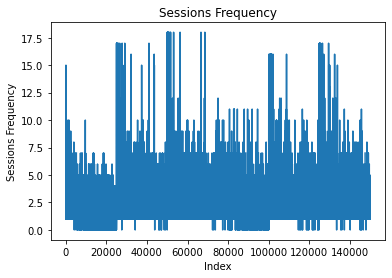

In [6]:
import matplotlib.pyplot as plt

# Plot the sessions_frequency column
plt.plot(df['sessions_frequency'])

# Set the title and axis labels
plt.title('Sessions Frequency')
plt.xlabel('Index')
plt.ylabel('Sessions Frequency')

# Display the plot
plt.show()

In [7]:
df['duration_of_session']

0         1823652.0
1         1365104.0
2         1361762.0
3         1321509.0
4         1089009.0
            ...    
149996      81230.0
149997      97970.0
149998      98249.0
149999      97910.0
150000          NaN
Name: duration_of_session, Length: 150001, dtype: float64

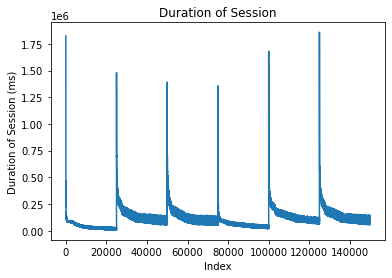

In [8]:
import matplotlib.pyplot as plt

# Plot the duration_of_session column
plt.plot(df['duration_of_session'])

# Set the title and axis labels
plt.title('Duration of Session')
plt.xlabel('Index')
plt.ylabel('Duration of Session (ms)')

# Display the plot
plt.show()


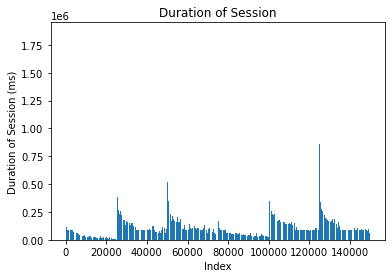

In [9]:
import matplotlib.pyplot as plt

# Create a bar chart of the duration_of_session column
plt.bar(df.index, df['duration_of_session'])

# Set the title and axis labels
plt.title('Duration of Session')
plt.xlabel('Index')
plt.ylabel('Duration of Session (ms)')

# Display the plot
plt.show()


In [10]:
df['session_total_traffic']

0         345629377.0
1         707185356.0
2         307690973.0
3         889352748.0
4         607681403.0
             ...     
149996    631804110.0
149997    705783925.0
149998    627698629.0
149999    401522016.0
150000            NaN
Name: session_total_traffic, Length: 150001, dtype: float64

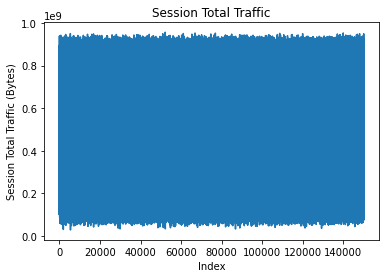

In [11]:
import matplotlib.pyplot as plt

# Plot the session_total_traffic column
plt.plot(df['session_total_traffic'])

# Set the title and axis labels
plt.title('Session Total Traffic')
plt.xlabel('Index')
plt.ylabel('Session Total Traffic (Bytes)')

# Display the plot
plt.show()


In [12]:
# task 2.1

In [13]:
# Aggregate the metrics per customer id
grouped_df = df.groupby('MSISDN/Number').agg({'sessions_frequency': 'sum', 'duration_of_session': 'sum', 'session_total_traffic': 'sum'})


In [14]:
grouped_df

,sessions_frequency,duration_of_session,session_total_traffic
MSISDN/Number,,,
3.360100e+10,1.0,116720.0,8.786906e+08
3.360100e+10,1.0,181230.0,1.568596e+08
3.360100e+10,1.0,134969.0,5.959665e+08
3.360101e+10,1.0,49878.0,4.223207e+08
3.360101e+10,4.0,37104.0,1.457411e+09
...,...,...,...
3.379000e+10,1.0,8810.0,7.146416e+08
3.379000e+10,1.0,140988.0,4.803073e+08
3.197020e+12,1.0,877385.0,2.321240e+08


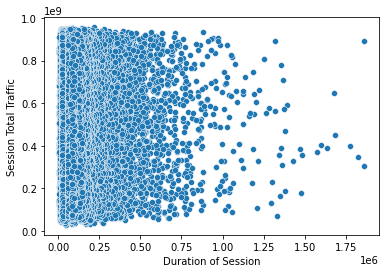

In [15]:
#lets plot duration and total traffic
import seaborn as sns


sns.scatterplot(x='duration_of_session',y='session_total_traffic',data=df)
plt.xlabel('Duration of Session')
plt.ylabel('Session Total Traffic')
plt.show()

In [16]:
# Report the top 10 customers per engagement metric
top_10_sessions_frequency = grouped_df.sort_values('sessions_frequency', ascending=False).head(10)
top_10_duration_of_session = grouped_df.sort_values('duration_of_session', ascending=False).head(10)
top_10_session_total_traffic = grouped_df.sort_values('session_total_traffic', ascending=False).head(10)


In [17]:
top_10_sessions_frequency

,sessions_frequency,duration_of_session,session_total_traffic
MSISDN/Number,,,
3.362632e+10,324.0,8791927.0,7.971167e+09
3.361489e+10,289.0,9966898.0,8.846226e+09
3.362578e+10,289.0,18553754.0,8.499621e+09
3.365973e+10,256.0,4035428.0,7.705863e+09
3.376054e+10,225.0,9279434.0,8.514774e+09
3.367588e+10,225.0,4865947.0,7.891111e+09
3.366716e+10,169.0,8744914.0,5.618394e+09
3.360452e+10,144.0,5207990.0,5.487855e+09
3.378632e+10,144.0,4059652.0,5.622232e+09


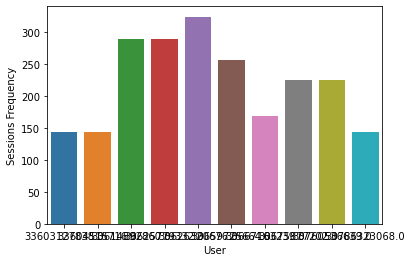

In [18]:
# assuming the index of the top_10_sessions_frequency DataFrame contains the user identifiers
x = top_10_sessions_frequency.index
y = top_10_sessions_frequency['sessions_frequency']

sns.barplot(x=x, y=y)
plt.xlabel('User')
plt.ylabel('Sessions Frequency')
plt.show()

In [19]:
top_10_duration_of_session

,sessions_frequency,duration_of_session,session_total_traffic
MSISDN/Number,,,
3.362578e+10,289.0,18553754.0,8.499621e+09
3.361489e+10,289.0,9966898.0,8.846226e+09
3.376054e+10,225.0,9279434.0,8.514774e+09
3.362632e+10,324.0,8791927.0,7.971167e+09
3.366716e+10,169.0,8744914.0,5.618394e+09
3.366284e+10,81.0,6614270.0,4.000098e+09
3.366469e+10,81.0,6288730.0,5.682007e+09
3.360313e+10,144.0,6287761.0,4.976195e+09
3.366746e+10,36.0,5649882.0,2.600522e+09


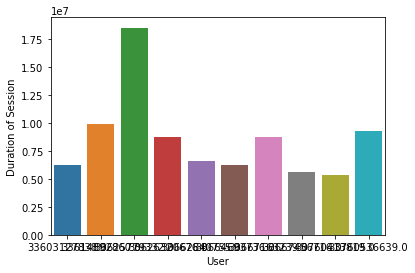

In [20]:
import seaborn as sns

# assuming the index of the top_10_duration_of_session DataFrame contains the user identifiers
x = top_10_duration_of_session.index
y = top_10_duration_of_session['duration_of_session']

sns.barplot(x=x, y=y)
plt.xlabel('User')
plt.ylabel('Duration of Session')
plt.show()


In [21]:
top_10_session_total_traffic

,sessions_frequency,duration_of_session,session_total_traffic
MSISDN/Number,,,
3.361489e+10,289.0,9966898.0,8.846226e+09
3.376054e+10,225.0,9279434.0,8.514774e+09
3.362578e+10,289.0,18553754.0,8.499621e+09
3.362632e+10,324.0,8791927.0,7.971167e+09
3.367588e+10,225.0,4865947.0,7.891111e+09
3.365973e+10,256.0,4035428.0,7.705863e+09
3.366646e+10,121.0,4536757.0,7.308501e+09
3.376041e+10,144.0,5321667.0,7.132371e+09
3.366471e+10,121.0,2927785.0,6.872018e+09


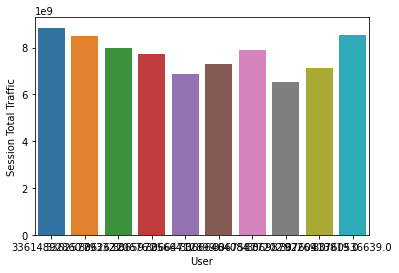

In [22]:


# assuming the index of the top_10_session_total_traffic DataFrame contains the user identifiers
x = top_10_session_total_traffic.index
y = top_10_session_total_traffic['session_total_traffic']

sns.barplot(x=x, y=y)
plt.xlabel('User')
plt.ylabel('Session Total Traffic')
plt.show()


In [23]:
# Normalize the engagement metrics
scaler = MinMaxScaler()
normalized_df = pd.DataFrame(scaler.fit_transform(grouped_df), columns=grouped_df.columns, index=grouped_df.index)
normalized_df 

,sessions_frequency,duration_of_session,session_total_traffic
MSISDN/Number,,,
3.360100e+10,0.003086,0.005908,0.095931
3.360100e+10,0.003086,0.009387,0.014026
3.360100e+10,0.003086,0.006892,0.063851
3.360101e+10,0.003086,0.002304,0.044148
3.360101e+10,0.012346,0.001615,0.161598
...,...,...,...
3.379000e+10,0.003086,0.000090,0.077317
3.379000e+10,0.003086,0.007217,0.050727
3.197020e+12,0.003086,0.046922,0.022566


In [24]:
# Aggregate the metrics per customer ID
aggregated_data = df.groupby('MSISDN/Number').agg({
    'sessions_frequency': 'mean',
    'duration_of_session': 'sum',
    'session_total_traffic': 'sum',
    'Social Media DL (Bytes)': 'sum',
    'Social Media UL (Bytes)': 'sum',
    'Gaming DL (Bytes)':'sum',
    'Gaming UL (Bytes)':'sum',
    'Google DL (Bytes)': 'sum',
    'Google UL (Bytes)': 'sum',
    'Email DL (Bytes)': 'sum',
    'Email UL (Bytes)': 'sum',
    'Youtube DL (Bytes)': 'sum',
    'Youtube UL (Bytes)': 'sum',
    'Netflix DL (Bytes)': 'sum',
    'Netflix UL (Bytes)': 'sum',
    'Gaming DL (Bytes)': 'sum',
    'Gaming UL (Bytes)': 'sum',
    'Other DL (Bytes)': 'sum',
    'Other UL (Bytes)': 'sum'
})

In [25]:
# Report the top 10 customers per engagement metric
top_10_frequency = aggregated_data.nlargest(10, 'sessions_frequency')
top_10_duration = aggregated_data.nlargest(10, 'duration_of_session')
top_10_traffic = aggregated_data.nlargest(10, 'session_total_traffic')
top_10_social_media = aggregated_data.nlargest(10, 'Social Media DL (Bytes)')
top_10_google = aggregated_data.nlargest(10, 'Google DL (Bytes)')
top_10_email = aggregated_data.nlargest(10, 'Email DL (Bytes)')
top_10_youtube = aggregated_data.nlargest(10, 'Youtube DL (Bytes)')
top_10_netflix = aggregated_data.nlargest(10, 'Netflix DL (Bytes)')
top_10_gaming = aggregated_data.nlargest(10, 'Gaming DL (Bytes)')
top_10_other = aggregated_data.nlargest(10, 'Other DL (Bytes)')

In [26]:
# Print the results
print("Top 10 Customers by Session Frequency:")
print(top_10_frequency)
print("\nTop 10 Customers by Session Duration:")
print(top_10_duration)
print("\nTop 10 Customers by Total Traffic:")
print(top_10_traffic)
print("\nTop 10 Customers by Social Media Usage:")
print(top_10_social_media)
print("\nTop 10 Customers by Google Usage:")
print(top_10_google)
print("\nTop 10 Customers by Email Usage:")
print(top_10_email)
print("\nTop 10 Customers by YouTube Usage:")
print(top_10_youtube)
print("\nTop 10 Customers by Netflix Usage:")
print(top_10_netflix)
print("\nTop 10 Customers by Gaming Usage:")
print(top_10_gaming)
print("\nTop 10 Customers by Other Data Usage:")
print(top_10_other)

Top 10 Customers by Session Frequency:
               sessions_frequency  duration_of_session  session_total_traffic  \
MSISDN/Number                                                                   
3.362632e+10                 18.0            8791927.0           7.971167e+09   
3.361489e+10                 17.0            9966898.0           8.846226e+09   
3.362578e+10                 17.0           18553754.0           8.499621e+09   
3.365973e+10                 16.0            4035428.0           7.705863e+09   
3.367588e+10                 15.0            4865947.0           7.891111e+09   
3.376054e+10                 15.0            9279434.0           8.514774e+09   
3.366716e+10                 13.0            8744914.0           5.618394e+09   
3.360313e+10                 12.0            6287761.0           4.976195e+09   
3.360452e+10                 12.0            5207990.0           5.487855e+09   
3.362708e+10                 12.0            4703516.0           5.754

In [27]:
# Aggregate user total traffic per application
engagement_metric = ['Social Media DL (Bytes)', 'Social Media UL (Bytes)', 'Google DL (Bytes)', 'Google UL (Bytes)', 'Email DL (Bytes)', 'Email UL (Bytes)', 'Youtube DL (Bytes)', 'Youtube UL (Bytes)', 'Netflix DL (Bytes)', 'Netflix UL (Bytes)', 'Gaming DL (Bytes)', 'Gaming UL (Bytes)', 'Other DL (Bytes)', 'Other UL (Bytes)']
aggregated_data = df.groupby('MSISDN/Number')[engagement_metric].sum()
aggregated_data['total_traffic'] = aggregated_data.sum(axis=1)
aggregated_data


,Social Media DL (Bytes),Social Media UL (Bytes),Google DL (Bytes),Google UL (Bytes),Email DL (Bytes),Email UL (Bytes),Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),total_traffic
MSISDN/Number,,,,,,,,,,,,,,,
3.360100e+10,2206504.0,25631.0,3337123.0,1051882.0,837400.0,493962.0,14900201.0,6724347.0,10265105.0,16915876.0,8.110911e+08,1367528.0,377096990.0,9473882.0,1.255788e+09
3.360100e+10,2598548.0,62017.0,4197697.0,1137166.0,2828821.0,478960.0,5324251.0,7107972.0,770569.0,10451194.0,1.050353e+08,14714780.0,279557701.0,2152370.0,4.364173e+08
3.360100e+10,3148004.0,47619.0,3343483.0,99643.0,2436500.0,768880.0,2137272.0,19196298.0,16525919.0,2827981.0,5.290685e+08,9759228.0,495086501.0,6607171.0,1.091053e+09
3.360101e+10,251469.0,28825.0,5937765.0,3740728.0,2178618.0,106052.0,4393123.0,2584198.0,1157362.0,784730.0,3.880748e+08,3051292.0,25248001.0,10031701.0,4.475687e+08
3.360101e+10,2861230.0,51312.0,13728668.0,4770948.0,2247808.0,1057661.0,10339971.0,31193031.0,24971647.0,24230077.0,1.308981e+09,5816727.0,777643713.0,27160771.0,2.235055e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3.379000e+10,234320.0,65863.0,6834178.0,697091.0,480946.0,525969.0,8294310.0,18353533.0,14754741.0,147797.0,6.573267e+08,3034642.0,291391283.0,3891534.0,1.006033e+09
3.379000e+10,442214.0,56355.0,1472406.0,3957299.0,2513433.0,664.0,5596862.0,14254710.0,6929961.0,1601099.0,4.276202e+08,9383076.0,204636073.0,6479040.0,6.849434e+08
3.197020e+12,668596.0,46628.0,8572779.0,1865881.0,842279.0,678492.0,9839889.0,2120016.0,10340908.0,16251392.0,1.645636e+08,13485133.0,467678100.0,2848373.0,6.998021e+08


In [28]:
aggregated_data['total_traffic']

MSISDN/Number
3.360100e+10    1.255788e+09
3.360100e+10    4.364173e+08
3.360100e+10    1.091053e+09
3.360101e+10    4.475687e+08
3.360101e+10    2.235055e+09
                    ...     
3.379000e+10    1.006033e+09
3.379000e+10    6.849434e+08
3.197020e+12    6.998021e+08
3.370000e+14    7.406419e+08
8.823970e+14    5.283134e+08
Name: total_traffic, Length: 106856, dtype: float64

In [29]:
# Derive the top 10 most engaged users per application
top_10_per_app = {}
for app in engagement_metric :
    top_10_per_app[app] = aggregated_data.sort_values(app, ascending=False).head(10)

top_10_per_app[app]

,Social Media DL (Bytes),Social Media UL (Bytes),Google DL (Bytes),Google UL (Bytes),Email DL (Bytes),Email UL (Bytes),Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),total_traffic
MSISDN/Number,,,,,,,,,,,,,,,
3.362578e+10,26564121.0,571379.0,107904739.0,34403176.0,31895412.0,8738554.0,237883033.0,215075736.0,193912238.0,163068369.0,7.171884e+09,154789688.0,6.201653e+09,152930478.0,1.470127e+10
3.361489e+10,27749744.0,544800.0,93941708.0,34032079.0,33607211.0,7181423.0,199823443.0,194546775.0,179585986.0,181815060.0,7.622035e+09,127396833.0,7.495298e+09,143966031.0,1.634152e+10
3.362632e+10,42743837.0,630942.0,116106455.0,36085397.0,33404785.0,9013997.0,164048706.0,210434341.0,199479238.0,129246502.0,6.745734e+09,141838597.0,8.025477e+09,142400945.0,1.599664e+10
3.365973e+10,34900444.0,511914.0,90958549.0,25557796.0,29907647.0,6092145.0,119658146.0,138332942.0,196277206.0,203241873.0,6.609900e+09,115658741.0,6.182551e+09,134864910.0,1.388841e+10
3.367588e+10,18655364.0,567557.0,83002994.0,26857508.0,24284723.0,7229698.0,158665235.0,158745337.0,161626462.0,147466697.0,6.863307e+09,107260559.0,6.665074e+09,133441436.0,1.455618e+10
3.376054e+10,39297646.0,485543.0,88626532.0,34596567.0,26437895.0,7255872.0,194068298.0,202220900.0,146500839.0,188142430.0,7.316364e+09,144681056.0,4.590038e+09,126096213.0,1.310481e+10
3.376041e+10,20515774.0,261431.0,56331853.0,26406867.0,21791296.0,3785669.0,174245981.0,128923126.0,167023809.0,151323737.0,6.170943e+09,97676681.0,3.988504e+09,113141379.0,1.112087e+10
3.366471e+10,19035729.0,354870.0,64946017.0,25443355.0,15213560.0,6212447.0,153074482.0,123759531.0,134941569.0,116857240.0,6.013562e+09,90293610.0,3.868637e+09,108323400.0,1.074066e+10
3.365836e+10,16865613.0,420146.0,58671984.0,17835154.0,17553922.0,2128126.0,119379568.0,141610278.0,131358936.0,132783142.0,5.628473e+09,77446285.0,4.905779e+09,107871346.0,1.135818e+10


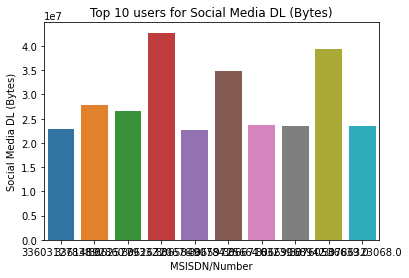

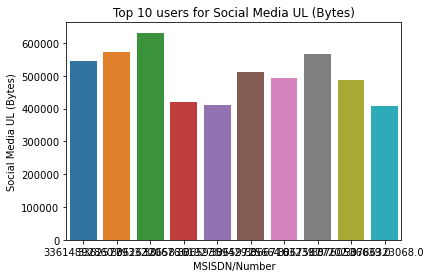

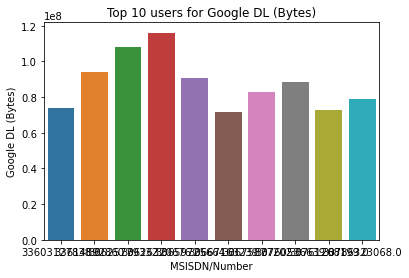

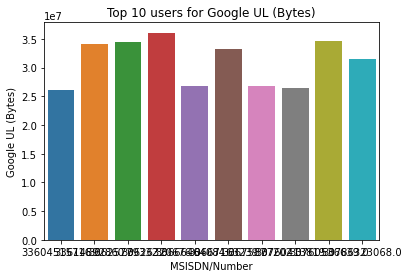

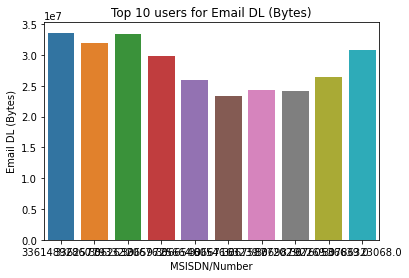

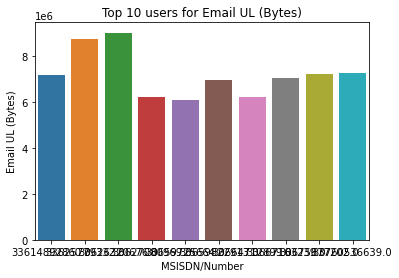

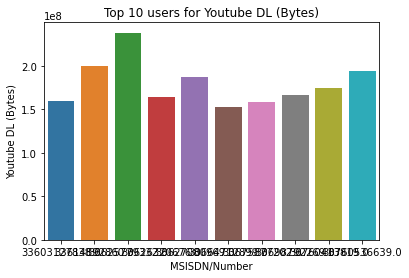

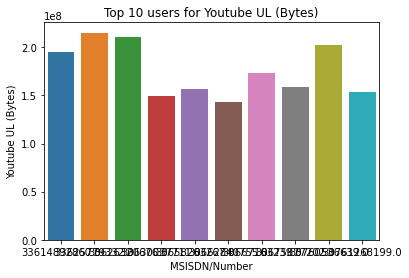

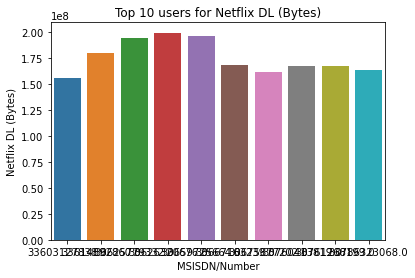

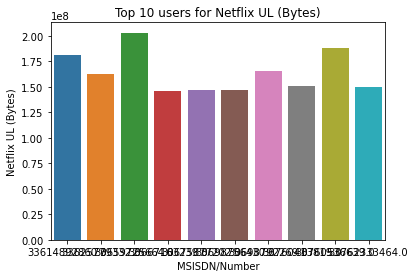

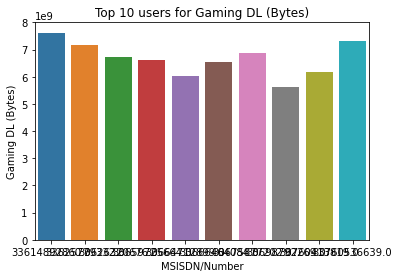

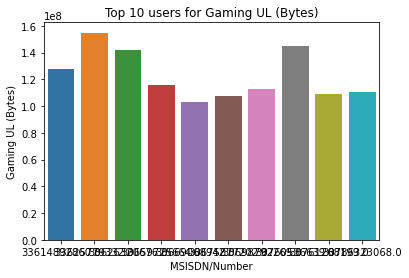

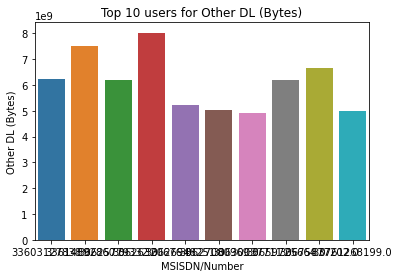

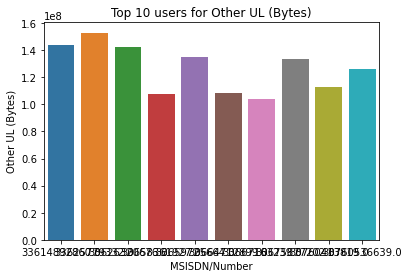

In [90]:
 # Derive the top 10 most engaged users per application
top_10_per_app = {}
for app in engagement_metric:
    top_10_per_app[app] = aggregated_data.sort_values(app, ascending=False).head(10)

# Plot the results using Seaborn
for app, data in top_10_per_app.items():
    sns.barplot(x=data.index, y=app, data=data)
    plt.title(f'Top 10 users for {app}')
    plt.show()

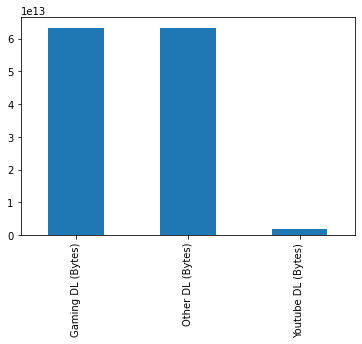

In [88]:
import pandas as pd
import matplotlib.pyplot as plt

engagement_metric = ['Social Media DL (Bytes)', 'Social Media UL (Bytes)', 'Google DL (Bytes)', 'Google UL (Bytes)', 'Email DL (Bytes)', 'Email UL (Bytes)', 'Youtube DL (Bytes)', 'Youtube UL (Bytes)', 'Netflix DL (Bytes)', 'Netflix UL (Bytes)', 'Gaming DL (Bytes)', 'Gaming UL (Bytes)', 'Other DL (Bytes)', 'Other UL (Bytes)']

# Sum the engagement metrics for each app and sort in descending order
app_engagement = df[engagement_metric].sum().sort_values(ascending=False)
top_3_apps = app_engagement.head(3)
top_3_apps.plot(kind='bar')
plt.show()


In [32]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt


In [33]:
# Normalize the engagement metrics
scaler = MinMaxScaler()
normalized_df = pd.DataFrame(scaler.fit_transform(aggregated_data), columns=aggregated_data.columns, index=grouped_df.index)
normalized_df

,Social Media DL (Bytes),Social Media UL (Bytes),Google DL (Bytes),Google UL (Bytes),Email DL (Bytes),Email UL (Bytes),Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),total_traffic
MSISDN/Number,,,,,,,,,,,,,,,
3.360100e+10,0.051621,0.040623,0.028740,0.029150,0.024914,0.054798,0.062636,0.031265,0.051459,0.083230,0.106414,0.008834,0.046987,0.061948,0.073538
3.360100e+10,0.060793,0.098293,0.036152,0.031513,0.084170,0.053134,0.022382,0.033048,0.003863,0.051422,0.013780,0.095063,0.034833,0.014073,0.023218
3.360100e+10,0.073648,0.075473,0.028795,0.002761,0.072497,0.085297,0.008984,0.089253,0.082845,0.013914,0.069413,0.063048,0.061689,0.043203,0.063421
3.360101e+10,0.005883,0.045686,0.051139,0.103663,0.064823,0.011764,0.018467,0.012015,0.005802,0.003861,0.050915,0.019712,0.003146,0.065596,0.023902
3.360101e+10,0.066939,0.081326,0.118241,0.132213,0.066882,0.117334,0.043466,0.145032,0.125184,0.119218,0.171736,0.037578,0.096897,0.177601,0.133678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3.379000e+10,0.005482,0.104388,0.058860,0.019318,0.014308,0.058349,0.034867,0.085335,0.073966,0.000727,0.086240,0.019605,0.036308,0.025445,0.058199
3.379000e+10,0.010345,0.089319,0.012680,0.109665,0.074786,0.000072,0.023528,0.066277,0.034740,0.007878,0.056103,0.060618,0.025498,0.042365,0.038480
3.197020e+12,0.015642,0.073902,0.073834,0.051707,0.025060,0.075270,0.041364,0.009857,0.051839,0.079961,0.021590,0.087119,0.058274,0.018624,0.039393


In [34]:
# Use the elbow method to find the optimized value of k
centroid = []
K = range(1, 10)
for k in K:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(normalized_df)
    centroid.append(kmeans.inertia_)
centroid

[4887.19886610288,
 2997.9004904878207,
 2295.4826563354763,
 2121.755629797761,
 2044.783460862614,
 2003.1164118296053,
 1927.9656542546825,
 1888.5387276926822,
 1852.6735063156818]

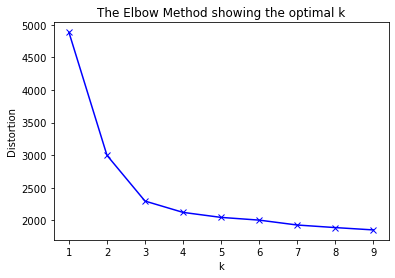

In [35]:
# Plot the elbow curve
plt.plot(K, centroid, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()


Introduction To Elbow Method
A fundamental step for any unsupervised algorithm is to determine the optimal number of clusters into which the data may be clustered. Since we do not have any predefined number of clusters in unsupervised learning. We tend to use some method that can help us decide the best number of clusters.  In the case of K-Means clustering, we use Elbow Method for defining the best number of clustering 

What Is the Elbow Method in K-Means Clustering
As we know in the k-means clustering algorithm we randomly initialize k clusters and we iteratively adjust these k clusters till these k-centroids riches in an equilibrium state. However, the main thing we do before initializing these clusters is that determine how many clusters we have to use. 

In [36]:
# Run k-means clustering with the optimized value of k
kmeans = KMeans(n_clusters=3) # replace 3 with the optimized value of k
kmeans.fit(normalized_df)
grouped_df['cluster'] = kmeans.labels_
kmeans.labels_

array([0, 0, 0, ..., 0, 0, 0])

In [38]:
# Get the cluster labels
cluster_labels = kmeans.labels_

# Add the cluster labels to the aggregated data
aggregated_data['Engagement Cluster'] = cluster_labels
cluster_metrics = aggregated_data.groupby('Engagement Cluster')[engagement_metric].agg(['min', 'max', 'mean', 'sum'])
print(cluster_metrics)
# Calculate the standard deviation for each metric within each cluster
cluster_std = aggregated_data.groupby('Engagement Cluster')[engagement_metric].std()


                   Social Media DL (Bytes)                            \
                                       min         max          mean   
Engagement Cluster                                                     
0                                     12.0   6830965.0  1.805159e+06   
1                                 913481.0  42743837.0  7.870289e+06   
2                                   7376.0  10206401.0  3.877012e+06   

                                 Social Media UL (Bytes)            \
                             sum                     min       max   
Engagement Cluster                                                   
0                   1.414342e+11                     0.0  126866.0   
1                   3.037144e+10                 16821.0  630942.0   
2                   9.555672e+10                   474.0  195747.0   

                                                Google DL (Bytes)  \
                             mean           sum               min   
Engageme

In [39]:
d=pd.DataFrame(cluster_metrics)

In [40]:
d

Social Media DL (Bytes)                            \
                                       min         max          mean   
Engagement Cluster                                                     
0                                     12.0   6830965.0  1.805159e+06   
1                                 913481.0  42743837.0  7.870289e+06   
2                                   7376.0  10206401.0  3.877012e+06   

                                 Social Media UL (Bytes)            \
                             sum                     min       max   
Engagement Cluster                                                   
0                   1.414342e+11                     0.0  126866.0   
1                   3.037144e+10                 16821.0  630942.0   
2                   9.555672e+10                   474.0  195747.0   

                                                Google DL (Bytes)  \
                             mean           sum               min   
Engagement Cluster                                                  
0                    33020.381557  2.587147e+09             207.0   
1                   145703.681005  5.622705e+08         2438302.0   
2                    71155.856047  1.753778e+09          128826.0   

                                 ... Gaming UL (Bytes)                \
                            max  ...              mean           sum   
Engagement Cluster               ...                                   
0                    21915547.0  ...      8.318757e+06  6.517746e+11   
1                   116106455.0  ...      3.653114e+07  1.409737e+11   
2                    33739788.0  ...      1.792456e+07  4.417866e+11   

                   Other DL (Bytes)                                            \
                                min           max          mean           sum   
Engagement Cluster                                                              
0                            3290.0  1.490065e+09  4.224865e+08  3.310182e+13   
1                       251653868.0  8.025477e+09  1.872660e+09  7.226593e+12   
2                         4343361.0  2.417214e+09  9.086366e+08  2.239517e+13   

                   Other UL (Bytes)                                           
                                min          max          mean           sum  
Engagement Cluster                                                            
0                             156.0   32540875.0  8.307084e+06  6.508600e+11  
1                         3788899.0  152930478.0  3.659608e+07  1.412243e+11  
2                          167791.0   48200544.0  1.779502e+07  4.385938e+11  

[3 rows x 56 columns]

In [41]:
d.columns

MultiIndex([('Social Media DL (Bytes)',  'min'),
            ('Social Media DL (Bytes)',  'max'),
            ('Social Media DL (Bytes)', 'mean'),
            ('Social Media DL (Bytes)',  'sum'),
            ('Social Media UL (Bytes)',  'min'),
            ('Social Media UL (Bytes)',  'max'),
            ('Social Media UL (Bytes)', 'mean'),
            ('Social Media UL (Bytes)',  'sum'),
            (      'Google DL (Bytes)',  'min'),
            (      'Google DL (Bytes)',  'max'),
            (      'Google DL (Bytes)', 'mean'),
            (      'Google DL (Bytes)',  'sum'),
            (      'Google UL (Bytes)',  'min'),
            (      'Google UL (Bytes)',  'max'),
            (      'Google UL (Bytes)', 'mean'),
            (      'Google UL (Bytes)',  'sum'),
            (       'Email DL (Bytes)',  'min'),
            (       'Email DL (Bytes)',  'max'),
            (       'Email DL (Bytes)', 'mean'),
            (       'Email DL (Bytes)',  'sum'),
            (       

In [42]:
a=pd.DataFrame(aggregated_data)
a

,Social Media DL (Bytes),Social Media UL (Bytes),Google DL (Bytes),Google UL (Bytes),Email DL (Bytes),Email UL (Bytes),Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),total_traffic,Engagement Cluster
MSISDN/Number,,,,,,,,,,,,,,,,
3.360100e+10,2206504.0,25631.0,3337123.0,1051882.0,837400.0,493962.0,14900201.0,6724347.0,10265105.0,16915876.0,8.110911e+08,1367528.0,377096990.0,9473882.0,1.255788e+09,0
3.360100e+10,2598548.0,62017.0,4197697.0,1137166.0,2828821.0,478960.0,5324251.0,7107972.0,770569.0,10451194.0,1.050353e+08,14714780.0,279557701.0,2152370.0,4.364173e+08,0
3.360100e+10,3148004.0,47619.0,3343483.0,99643.0,2436500.0,768880.0,2137272.0,19196298.0,16525919.0,2827981.0,5.290685e+08,9759228.0,495086501.0,6607171.0,1.091053e+09,0
3.360101e+10,251469.0,28825.0,5937765.0,3740728.0,2178618.0,106052.0,4393123.0,2584198.0,1157362.0,784730.0,3.880748e+08,3051292.0,25248001.0,10031701.0,4.475687e+08,0
3.360101e+10,2861230.0,51312.0,13728668.0,4770948.0,2247808.0,1057661.0,10339971.0,31193031.0,24971647.0,24230077.0,1.308981e+09,5816727.0,777643713.0,27160771.0,2.235055e+09,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3.379000e+10,234320.0,65863.0,6834178.0,697091.0,480946.0,525969.0,8294310.0,18353533.0,14754741.0,147797.0,6.573267e+08,3034642.0,291391283.0,3891534.0,1.006033e+09,0
3.379000e+10,442214.0,56355.0,1472406.0,3957299.0,2513433.0,664.0,5596862.0,14254710.0,6929961.0,1601099.0,4.276202e+08,9383076.0,204636073.0,6479040.0,6.849434e+08,0
3.197020e+12,668596.0,46628.0,8572779.0,1865881.0,842279.0,678492.0,9839889.0,2120016.0,10340908.0,16251392.0,1.645636e+08,13485133.0,467678100.0,2848373.0,6.998021e+08,0


In [ ]:

# Select the columns to plot
cols = ['Social Media DL (Bytes)', 'Social Media UL (Bytes)', 'Google DL (Bytes)', 'Google UL (Bytes)', 'Email DL (Bytes)', 'Email UL (Bytes)', 'Youtube DL (Bytes)', 'Youtube UL (Bytes)', 'Netflix DL (Bytes)', 'Netflix UL (Bytes)', 'Gaming DL (Bytes)', 'Gaming UL (Bytes)', 'Other DL (Bytes)', 'Other UL (Bytes)']

# Create a pairplot with hue representing the engagement cluster
sns.pairplot(data=a, vars=cols, hue='Engagement Cluster')

plt.show()

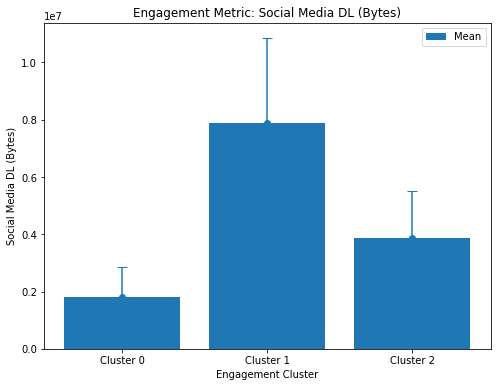

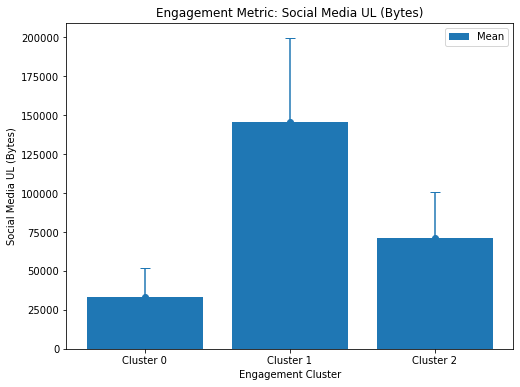

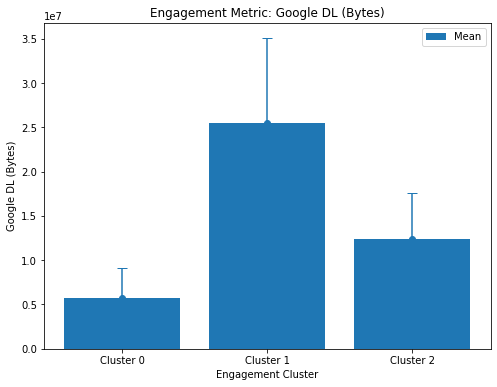

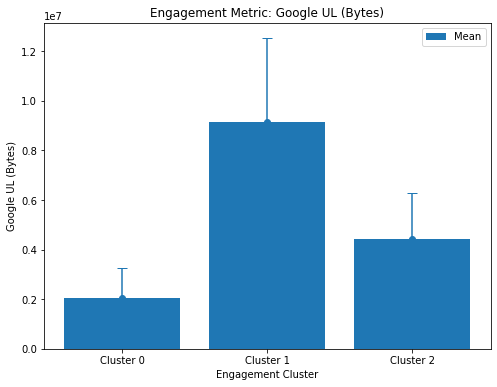

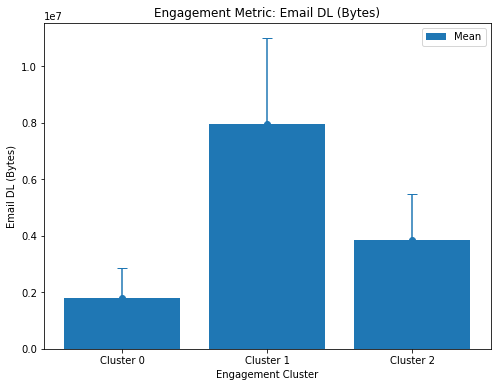

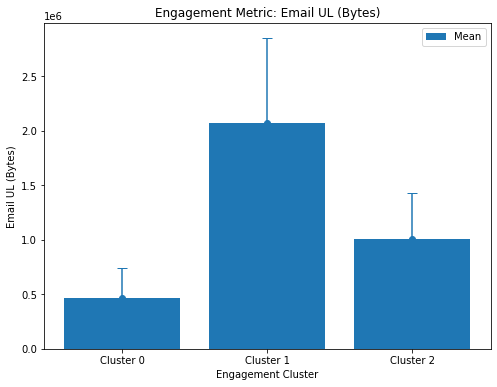

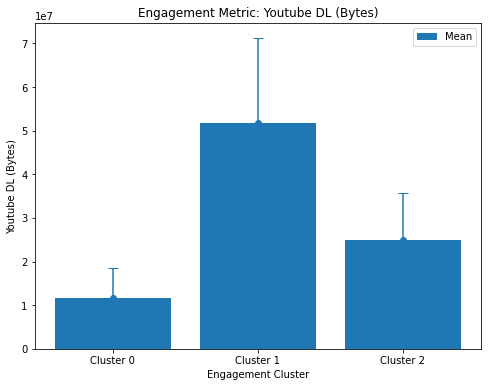

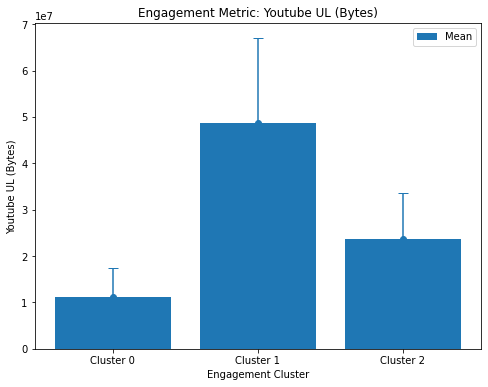

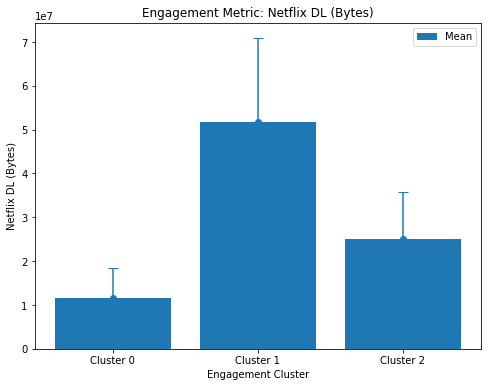

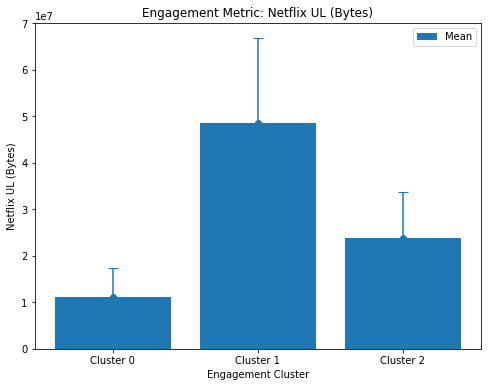

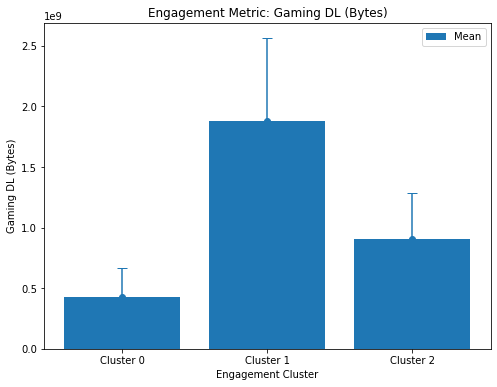

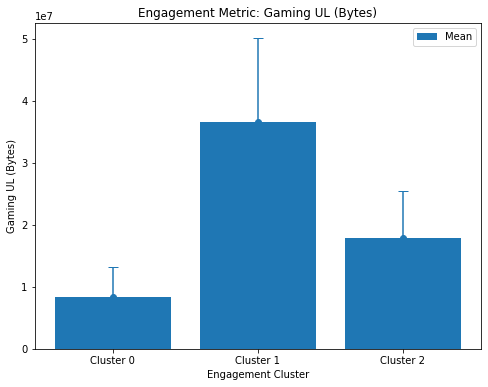

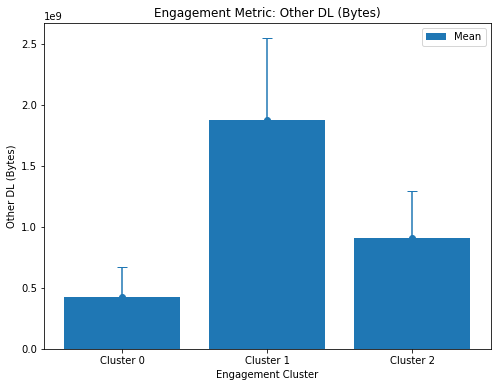

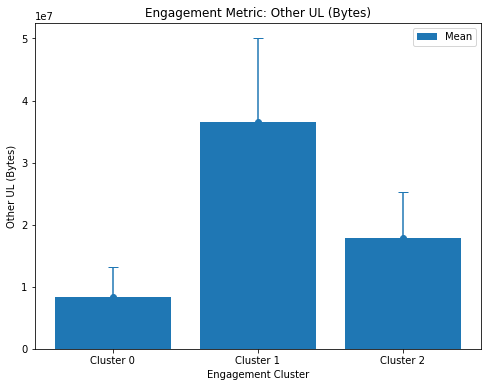

In [46]:
# Plot the metrics for each cluster
for metric in engagement_metric:
    plt.figure(figsize=(8, 6))
    cluster_values = cluster_metrics[metric]
    cluster_std_values = cluster_std[metric]
    x_labels = ['Cluster 0', 'Cluster 1', 'Cluster 2']
    x = range(len(x_labels))
    plt.bar(x, cluster_values['mean'], label='Mean')
    plt.errorbar(x, cluster_values['mean'], yerr=cluster_std_values, fmt='o', capsize=5)
    plt.xlabel('Engagement Cluster')
    plt.ylabel(metric)
    plt.title(f'Engagement Metric: {metric}')
    plt.xticks(x, x_labels)
    plt.legend()
    plt.show()

In [45]:
# task 3.1

In [47]:
import pandas as pd
import numpy as np

# Load the data
df = pd.read_csv('telcom_data1.csv')


In [48]:
df.columns

Index(['Bearer Id', 'Start', 'Start ms', 'End', 'End ms', 'Dur. (ms)', 'IMSI',
       'MSISDN/Number', 'IMEI', 'Last Location Name', 'Avg RTT DL (ms)',
       'Avg RTT UL (ms)', 'Avg Bearer TP DL (kbps)', 'Avg Bearer TP UL (kbps)',
       'TCP DL Retrans. Vol (Bytes)', 'TCP UL Retrans. Vol (Bytes)',
       'DL TP < 50 Kbps (%)', '50 Kbps < DL TP < 250 Kbps (%)',
       '250 Kbps < DL TP < 1 Mbps (%)', 'DL TP > 1 Mbps (%)',
       'UL TP < 10 Kbps (%)', '10 Kbps < UL TP < 50 Kbps (%)',
       '50 Kbps < UL TP < 300 Kbps (%)', 'UL TP > 300 Kbps (%)',
       'HTTP DL (Bytes)', 'HTTP UL (Bytes)', 'Activity Duration DL (ms)',
       'Activity Duration UL (ms)', 'Dur. (ms).1', 'Handset Manufacturer',
       'Handset Type', 'Nb of sec with 125000B < Vol DL',
       'Nb of sec with 1250B < Vol UL < 6250B',
       'Nb of sec with 31250B < Vol DL < 125000B',
       'Nb of sec with 37500B < Vol UL',
       'Nb of sec with 6250B < Vol DL < 31250B',
       'Nb of sec with 6250B < Vol UL < 37500B',


In [49]:
# Calculate the average TCP retransmission

df['avg_tcp_retransmission'] = (df['TCP DL Retrans. Vol (Bytes)'] + df['TCP UL Retrans. Vol (Bytes)']) / 2
df['avg_tcp_retransmission']

0        NaN
1        NaN
2        NaN
3        NaN
4        NaN
          ..
149996   NaN
149997   NaN
149998   NaN
149999   NaN
150000   NaN
Name: avg_tcp_retransmission, Length: 150001, dtype: float64

In [50]:
df['avg_tcp_retransmission'].isnull().sum()

99530

In [51]:
df['avg_tcp_retransmission'].fillna(df['avg_tcp_retransmission'].mean(), inplace=True)


In [52]:
df['avg_tcp_retransmission'].isnull().sum()

0

In [53]:
# Calculate the average RTT
df['avg_rtt'] = (df['Avg RTT DL (ms)'] + df['Avg RTT UL (ms)']) / 2
df['avg_rtt']

0         23.5
1         35.0
2          NaN
3          NaN
4          NaN
          ... 
149996    16.0
149997    14.5
149998    24.5
149999    21.0
150000     NaN
Name: avg_rtt, Length: 150001, dtype: float64

In [54]:
# Calculate the average RTT
df['avg_rtt'].fillna(df['avg_rtt'].mean(), inplace=True)
df['avg_rtt']

0         23.500000
1         35.000000
2         63.512443
3         63.512443
4         63.512443
            ...    
149996    16.000000
149997    14.500000
149998    24.500000
149999    21.000000
150000    63.512443
Name: avg_rtt, Length: 150001, dtype: float64

In [55]:
df.columns

Index(['Bearer Id', 'Start', 'Start ms', 'End', 'End ms', 'Dur. (ms)', 'IMSI',
       'MSISDN/Number', 'IMEI', 'Last Location Name', 'Avg RTT DL (ms)',
       'Avg RTT UL (ms)', 'Avg Bearer TP DL (kbps)', 'Avg Bearer TP UL (kbps)',
       'TCP DL Retrans. Vol (Bytes)', 'TCP UL Retrans. Vol (Bytes)',
       'DL TP < 50 Kbps (%)', '50 Kbps < DL TP < 250 Kbps (%)',
       '250 Kbps < DL TP < 1 Mbps (%)', 'DL TP > 1 Mbps (%)',
       'UL TP < 10 Kbps (%)', '10 Kbps < UL TP < 50 Kbps (%)',
       '50 Kbps < UL TP < 300 Kbps (%)', 'UL TP > 300 Kbps (%)',
       'HTTP DL (Bytes)', 'HTTP UL (Bytes)', 'Activity Duration DL (ms)',
       'Activity Duration UL (ms)', 'Dur. (ms).1', 'Handset Manufacturer',
       'Handset Type', 'Nb of sec with 125000B < Vol DL',
       'Nb of sec with 1250B < Vol UL < 6250B',
       'Nb of sec with 31250B < Vol DL < 125000B',
       'Nb of sec with 37500B < Vol UL',
       'Nb of sec with 6250B < Vol DL < 31250B',
       'Nb of sec with 6250B < Vol UL < 37500B',


In [56]:
# Calculate the average throughput
df['avg_throughput'] = (df['Avg Bearer TP DL (kbps)'] + df['Avg Bearer TP UL (kbps)']) / 2
df['avg_throughput']

0         33.5
1         21.0
2          7.5
3         44.0
4          7.5
          ... 
149996    58.5
149997    38.5
149998    45.0
149999    35.5
150000     NaN
Name: avg_throughput, Length: 150001, dtype: float64

In [57]:
df.columns

Index(['Bearer Id', 'Start', 'Start ms', 'End', 'End ms', 'Dur. (ms)', 'IMSI',
       'MSISDN/Number', 'IMEI', 'Last Location Name', 'Avg RTT DL (ms)',
       'Avg RTT UL (ms)', 'Avg Bearer TP DL (kbps)', 'Avg Bearer TP UL (kbps)',
       'TCP DL Retrans. Vol (Bytes)', 'TCP UL Retrans. Vol (Bytes)',
       'DL TP < 50 Kbps (%)', '50 Kbps < DL TP < 250 Kbps (%)',
       '250 Kbps < DL TP < 1 Mbps (%)', 'DL TP > 1 Mbps (%)',
       'UL TP < 10 Kbps (%)', '10 Kbps < UL TP < 50 Kbps (%)',
       '50 Kbps < UL TP < 300 Kbps (%)', 'UL TP > 300 Kbps (%)',
       'HTTP DL (Bytes)', 'HTTP UL (Bytes)', 'Activity Duration DL (ms)',
       'Activity Duration UL (ms)', 'Dur. (ms).1', 'Handset Manufacturer',
       'Handset Type', 'Nb of sec with 125000B < Vol DL',
       'Nb of sec with 1250B < Vol UL < 6250B',
       'Nb of sec with 31250B < Vol DL < 125000B',
       'Nb of sec with 37500B < Vol UL',
       'Nb of sec with 6250B < Vol DL < 31250B',
       'Nb of sec with 6250B < Vol UL < 37500B',


In [58]:
df['avg_throughput'].fillna(df['avg_throughput'].mean(), inplace=True)
df['avg_throughput']

0           33.500000
1           21.000000
2            7.500000
3           44.000000
4            7.500000
             ...     
149996      58.500000
149997      38.500000
149998      45.000000
149999      35.500000
150000    7535.237287
Name: avg_throughput, Length: 150001, dtype: float64

In [59]:
Handset_Type = df.groupby('MSISDN/Number').agg({
    'Handset Type': lambda x: x.mode()[0]
})

In [60]:
Handset_Type

,Handset Type
MSISDN/Number,
3.360100e+10,Huawei P20 Lite Huawei Nova 3E
3.360100e+10,Apple iPhone 7 (A1778)
3.360100e+10,undefined
3.360101e+10,Apple iPhone 5S (A1457)
3.360101e+10,Apple iPhone Se (A1723)
...,...
3.379000e+10,Huawei Honor 9 Lite
3.379000e+10,Apple iPhone 8 Plus (A1897)
3.197020e+12,Quectel Wireless. Quectel Ec25-E


In [61]:
# Treat outliers by replacing with the mean of the corresponding variable
def replace_outliers_with_mean(column):
    mean = column.mean()
    std = column.std()
    column[np.abs(column - mean) > 3 * std] = mean

replace_outliers_with_mean(df['avg_tcp_retransmission'])
replace_outliers_with_mean(df['avg_rtt'])
replace_outliers_with_mean(df['avg_throughput'])




C:\Users\Admin\AppData\Local\Temp\ipykernel_4212\1575306028.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  column[np.abs(column - mean) > 3 * std] = mean


In [62]:
# Aggregate the information per customer
grouped_df = df.groupby('MSISDN/Number').agg({
    'avg_tcp_retransmission': 'mean',
    'avg_rtt': 'mean',
    'Handset Type': lambda x: x.mode()[0],
    'avg_throughput': 'mean'
})


In [63]:
grouped_df

,avg_tcp_retransmission,avg_rtt,Handset Type,avg_throughput
MSISDN/Number,,,,
3.360100e+10,1.285848e+07,23.000000,Huawei P20 Lite Huawei Nova 3E,38.0
3.360100e+10,1.285848e+07,15.500000,Apple iPhone 7 (A1778),49.5
3.360100e+10,1.285848e+07,63.512443,undefined,48.5
3.360101e+10,1.285848e+07,42.000000,Apple iPhone 5S (A1457),124.0
3.360101e+10,8.771950e+06,29.750000,Apple iPhone Se (A1723),14211.0
...,...,...,...,...
3.379000e+10,1.090225e+05,26.000000,Huawei Honor 9 Lite,5182.5
3.379000e+10,1.285848e+07,20.000000,Apple iPhone 8 Plus (A1897),58.0
3.197020e+12,1.285848e+07,63.512443,Quectel Wireless. Quectel Ec25-E,0.5


This script first calculates the average TCP retransmission, average RTT, and average throughput for each row in the DataFrame df. It does this by adding the relevant columns and dividing by 2.

Next, it treats missing values by replacing them with the mean of the corresponding variable. This is done using the fillna method of the Series object.

The script also treats outliers by replacing them with the mean of the corresponding variable. This is done using a custom function replace_outliers_with_mean that calculates the mean and standard deviation of a column, and replaces values that are more than 3 standard deviations away from the mean with the mean value.

Finally, the script aggregates the information per customer using the groupby and agg methods of the DataFrame object. The resulting DataFrame grouped_df contains one row for each customer, with columns for the average TCP retransmission, average RTT, handset type, and average throughput.



In [64]:
# task 3.2

In [65]:




# Compute and list the top, bottom, and most frequent TCP values
top_10_tcp = df.nlargest(10, 'avg_tcp_retransmission')['avg_tcp_retransmission']
bottom_10_tcp = df.nsmallest(10, 'avg_tcp_retransmission')['avg_tcp_retransmission']
most_frequent_tcp = df['avg_tcp_retransmission'].value_counts().head(10)
print('top_10_tcp',top_10_tcp)
print('bottom_10_tcp',bottom_10_tcp)
print('most_frequent_tcp',most_frequent_tcp)

top_10_tcp 97421     187763843.5
85773     187493780.5
115659    187194362.0
121394    186210000.0
121428    186137626.0
61577     185210309.5
79891     184979573.5
17637     184383727.0
61162     184112767.5
3449      183635429.5
Name: avg_tcp_retransmission, dtype: float64
bottom_10_tcp 143594    43.0
111100    48.5
18417     53.0
13142     54.0
97061     56.5
8794      64.0
99947     64.5
83214     67.0
95955     67.0
12849     71.5
Name: avg_tcp_retransmission, dtype: float64
most_frequent_tcp 1.285848e+07    99530
1.285848e+07      536
1.330000e+03       29
2.660000e+03       24
3.325000e+03       20
1.995000e+03       19
3.990000e+03       14
9.365000e+02       13
7.980000e+03        9
1.324000e+03        9
Name: avg_tcp_retransmission, dtype: int64


In [66]:
# Compute and list the top, bottom, and most frequent RTT values
top_10_rtt = df.nlargest(10, 'avg_rtt')['avg_rtt']
bottom_10_rtt = df.nsmallest(10, 'avg_rtt')['avg_rtt']
most_frequent_rtt = df['avg_rtt'].value_counts().head(10)

In [67]:
print('top_10_rtt :',top_10_rtt)
print('bottom_10_rtt',bottom_10_rtt)
print('most_frequent_rtt',most_frequent_rtt)

top_10_rtt : 133602    904.5
145025    904.5
19571     904.0
117178    904.0
22397     902.5
110690    900.0
56955     899.5
90204     899.5
125951    899.5
92446     899.0
Name: avg_rtt, dtype: float64
bottom_10_rtt 42602     0.0
103321    0.0
124538    0.0
143878    0.0
71738     1.0
50966     2.0
144923    2.0
103544    2.5
8756      3.0
123210    3.0
Name: avg_rtt, dtype: float64
most_frequent_rtt 63.512443    27840
14.500000     4993
19.500000     4222
19.000000     2761
20.000000     2647
15.000000     2592
14.000000     2424
24.500000     2219
20.500000     1978
15.500000     1960
Name: avg_rtt, dtype: int64


In [68]:
# Compute and list the top, bottom, and most frequent throughput values
top_10_throughput = df.nlargest(10, 'avg_throughput')['avg_throughput']
bottom_10_throughput = df.nsmallest(10, 'avg_throughput')['avg_throughput']
most_frequent_throughput = df['avg_throughput'].value_counts().head(10)


In [69]:
print('top_10_throughput',top_10_throughput)
print('bottom_10_throughput',bottom_10_throughput)
print('most_frequent_throughput',most_frequent_throughput)

top_10_throughput 37833     47764.5
11646     47762.5
35600     47748.5
66672     47745.5
37286     47745.0
142394    47745.0
102580    47738.5
138212    47735.0
133498    47732.0
2525      47730.0
Name: avg_throughput, dtype: float64
bottom_10_throughput 148     0.0
614     0.0
2460    0.0
3893    0.0
4129    0.0
4822    0.0
5796    0.0
5961    0.0
6135    0.0
7186    0.0
Name: avg_throughput, dtype: float64
most_frequent_throughput 31.500000      3886
7.500000       3741
7535.237287    2989
48.500000      1945
45.000000      1885
49.000000      1801
48.000000      1671
49.500000      1571
44.500000      1557
45.500000      1520
Name: avg_throughput, dtype: int64


In [70]:
# task 3.3 compute and report

In [71]:
# d. Compute the distribution of the average throughput per handset type
throughput_per_handset = df.groupby('Handset Type')['avg_throughput'].mean()
throughput_per_handset

Handset Type
A-Link Telecom I. Cubot A5                                                             11755.000000
A-Link Telecom I. Cubot Note Plus                                                       3349.500000
A-Link Telecom I. Cubot Note S                                                          4468.500000
A-Link Telecom I. Cubot Nova                                                           28108.500000
A-Link Telecom I. Cubot Power                                                          34734.000000
                                                                                           ...     
Zte Zte Blade C2 Smartphone Android By Sfr Startrail 4 Zte Blade Flex T809 Zte T809       29.000000
Zyxel Communicat. Lte7460                                                              30978.000000
Zyxel Communicat. Sbg3600                                                               7535.237287
Zyxel Communicat. Zyxel Wah7706                                                        

In [96]:
top_10_throughput_per_handset=throughput_per_handset.nlargest(10)
top_10_throughput_per_handset

Handset Type
Huawei Y9 2019                            45869.500000
Spa Condor Elect. Allure M2               42155.750000
Ovvi-Cellphone T. Echo                    39476.500000
Huawei Pele                               39190.500000
Spa Condor Elect. Plume L2                38264.500000
Shenzhen Leagoo. Leagoo S8                38054.000000
New-Bund Technol. Thor                    37814.833333
Doke Communicati. Blackview Bv6800 Pro    36729.500000
Xiaomi Communica. M1803E1A                36332.500000
Oppo Cph1723                              35334.000000
Name: avg_throughput, dtype: float64

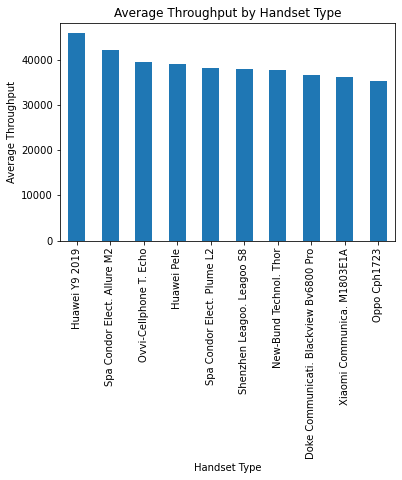

In [97]:
top_10_throughput_per_handset.plot(kind='bar')

# Add axis labels and a title
plt.xlabel('Handset Type')
plt.ylabel('Average Throughput')
plt.title('Average Throughput by Handset Type')

plt.show()

In [72]:
# e. Compute the average TCP retransmission view per handset type
tcp_per_handset = df.groupby('Handset Type')['avg_tcp_retransmission'].mean()
tcp_per_handset 

Handset Type
A-Link Telecom I. Cubot A5                                                             1.285848e+07
A-Link Telecom I. Cubot Note Plus                                                      3.081065e+05
A-Link Telecom I. Cubot Note S                                                         2.070587e+07
A-Link Telecom I. Cubot Nova                                                           6.858500e+04
A-Link Telecom I. Cubot Power                                                          4.020500e+03
                                                                                           ...     
Zte Zte Blade C2 Smartphone Android By Sfr Startrail 4 Zte Blade Flex T809 Zte T809    1.285848e+07
Zyxel Communicat. Lte7460                                                              2.063827e+07
Zyxel Communicat. Sbg3600                                                              2.674347e+07
Zyxel Communicat. Zyxel Wah7706                                                        

In [93]:
top_10_tcp_per_handset = tcp_per_handset.nlargest(10)

print(top_10_tcp_per_handset)

Handset Type
Huawei Bln-Al10                               1.645873e+08
Samsung Galaxy J8 2018                        5.787917e+07
Dynamic Tech Hol. D-Mobile I3 I5 I7 I8 I9     5.329110e+07
Xiaomi Communica. Mi 6                        3.769354e+07
Huawei Y7 Prime 2018                          3.265211e+07
Huawei E587 E587U-2 Turkcell Vinnwifi E587    3.154270e+07
Samsung Galaxy J5                             3.084644e+07
Zyxel Communicat. Sbg3600                     2.674347e+07
Samsung Galaxy Core 2 (Sm-G355X)              2.327950e+07
Sierra Wireless Usb305                        2.166248e+07
Name: avg_tcp_retransmission, dtype: float64


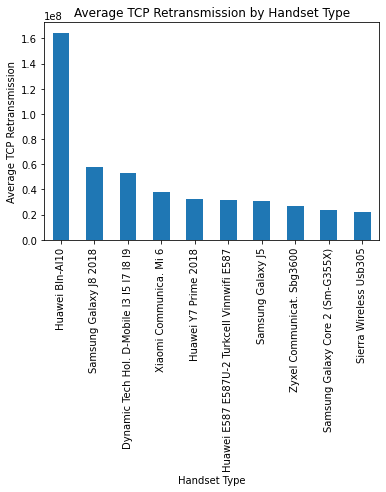

In [94]:
top_10_tcp_per_handset.plot(kind='bar')

# Add axis labels and a title
plt.xlabel('Handset Type')
plt.ylabel('Average TCP Retransmission')
plt.title('Average TCP Retransmission by Handset Type')

plt.show()

### task 3.4 -
Using the experience metrics above, perform a k-means clustering (where k = 3) to 
segment users into groups of experiences and provide a brief description of each cluster. (The 
description must define each group based on your understanding of the data)

In [73]:
#Check for missing values
print(df.isna().sum())

Bearer Id                                      991
Start                                            1
Start ms                                         1
End                                              1
End ms                                           1
Dur. (ms)                                        1
IMSI                                           570
MSISDN/Number                                 1066
IMEI                                           572
Last Location Name                            1153
Avg RTT DL (ms)                              27829
Avg RTT UL (ms)                              27812
Avg Bearer TP DL (kbps)                          1
Avg Bearer TP UL (kbps)                          1
TCP DL Retrans. Vol (Bytes)                  88146
TCP UL Retrans. Vol (Bytes)                  96649
DL TP < 50 Kbps (%)                            754
50 Kbps < DL TP < 250 Kbps (%)                 754
250 Kbps < DL TP < 1 Mbps (%)                  754
DL TP > 1 Mbps (%)             

In [74]:
#Fill missing values with the mean of the column
df.fillna(df[['avg_tcp_retransmission','avg_rtt','avg_throughput' ]].mean(), inplace=True)

In [75]:
df

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes),avg_tcp_retransmission,avg_rtt,avg_throughput
0,1.310000e+19,04-04-19 12:01,770.0,4/25/2019 14:35,662.0,1823652.0,2.082010e+14,3.366496e+10,3.552120e+13,9.16E+15,...,9656251.00,278082303.0,1.434415e+07,171744450.0,8.814393e+06,36749741.0,308879636.0,1.285848e+07,23.500000,33.500000
1,1.310000e+19,04-09-19 13:04,235.0,4/25/2019 8:15,606.0,1365104.0,2.082020e+14,3.368185e+10,3.579400e+13,L77566A,...,17227132.00,608750074.0,1.170709e+06,526904238.0,1.505514e+07,53800391.0,653384965.0,1.285848e+07,35.000000,21.000000
2,1.310000e+19,04-09-19 17:42,1.0,4/25/2019 11:58,652.0,1361762.0,2.082000e+14,3.376063e+10,3.528150e+13,D42335A,...,6163408.00,229584621.0,3.956300e+05,410692588.0,4.215763e+06,27883638.0,279807335.0,1.285848e+07,63.512443,7.500000
3,1.310000e+19,04-10-19 0:31,486.0,4/25/2019 7:36,171.0,1321509.0,2.082010e+14,3.375034e+10,3.535660e+13,T21824A,...,1097942.00,799538153.0,1.084972e+07,749039933.0,1.279728e+07,43324218.0,846028530.0,1.285848e+07,63.512443,44.000000
4,1.310000e+19,04-12-19 20:10,565.0,4/25/2019 10:40,954.0,1089009.0,2.082010e+14,3.369980e+10,3.540700e+13,D88865A,...,415218.00,527707248.0,3.529801e+06,550709500.0,1.391032e+07,38542814.0,569138589.0,1.285848e+07,63.512443,7.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149996,7.280000e+18,4/29/2019 7:28,451.0,4/30/2019 6:02,214.0,81230.0,2.082020e+14,3.365069e+10,3.548310e+13,D20434A,...,19678161.00,526609673.0,9.197207e+06,3264510.0,1.348742e+07,57628851.0,574175259.0,1.285848e+07,16.000000,58.500000
149997,7.350000e+18,4/29/2019 7:28,483.0,4/30/2019 10:41,187.0,97970.0,2.082020e+14,3.366345e+10,3.566050e+13,D10223C,...,21293148.00,626893062.0,4.735033e+06,712180387.0,2.457758e+06,39135081.0,666648844.0,1.285848e+07,14.500000,38.500000
149998,1.310000e+19,4/29/2019 7:28,283.0,4/30/2019 10:46,810.0,98249.0,2.082020e+14,3.362189e+10,3.572120e+13,T51102A,...,5065760.00,553539484.0,1.339432e+07,121100856.0,1.131473e+07,34912224.0,592786405.0,1.285848e+07,24.500000,45.000000
149999,1.310000e+19,4/29/2019 7:28,696.0,4/30/2019 10:40,327.0,97910.0,2.082020e+14,3.361962e+10,8.618620e+13,L88342B,...,13172589.00,352536971.0,2.529475e+06,814713113.0,1.406930e+06,29626096.0,371895920.0,1.285848e+07,21.000000,35.500000


In [76]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
# Normalize the experience  metrics
scaler = MinMaxScaler()
normalized_df = pd.DataFrame(scaler.fit_transform(df[['avg_tcp_retransmission', 'avg_rtt', 'avg_throughput']]), columns=['avg_tcp_retransmission', 'avg_rtt', 'avg_throughput'], index=df.index)
normalized_df

,avg_tcp_retransmission,avg_rtt,avg_throughput
0,0.068482,0.025981,0.000701
1,0.068482,0.038695,0.000440
2,0.068482,0.070218,0.000157
3,0.068482,0.070218,0.000921
4,0.068482,0.070218,0.000157
...,...,...,...
149996,0.068482,0.017689,0.001225
149997,0.068482,0.016031,0.000806
149998,0.068482,0.027087,0.000942
149999,0.068482,0.023217,0.000743


In [77]:
# Run k-means clustering with k=3
kmeans = KMeans(n_clusters=3)
kmeans.fit(normalized_df)
df['cluster'] = kmeans.labels_
df['cluster']

0         0
1         0
2         0
3         0
4         0
         ..
149996    0
149997    0
149998    0
149999    0
150000    0
Name: cluster, Length: 150001, dtype: int32

In [78]:
kmeans.labels_

array([0, 0, 0, ..., 0, 0, 0])

In [79]:


# Describe each cluster
for i in range(3):
    cluster_df = df[df['cluster'] == i]
    print(f'Cluster {i}:')
    print(f'  Size: {len(cluster_df)}')
    print(f'  Average TCP Retransmission: {cluster_df["avg_tcp_retransmission"].mean()}')
    print(f'  Average RTT: {cluster_df["avg_rtt"].mean()}')
    print(f'  Average Throughput: {cluster_df["avg_throughput"].mean()}')


Cluster 0:
  Size: 109843
  Average TCP Retransmission: 11616192.760524476
  Average RTT: 48.70769514901211
  Average Throughput: 862.5326198612322
Cluster 1:
  Size: 14057
  Average TCP Retransmission: 7082931.238741274
  Average RTT: 49.64997415088168
  Average Throughput: 32910.39965853312
Cluster 2:
  Size: 26101
  Average TCP Retransmission: 5204144.038946898
  Average RTT: 61.486356686216254
  Average Throughput: 15640.095759691965


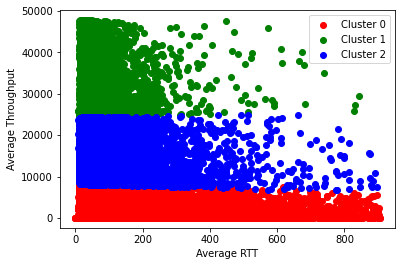

In [80]:
import matplotlib.pyplot as plt


fig, ax = plt.subplots()

colors = ['r', 'g', 'b']

for i in range(3):
    cluster_df = df[df['cluster'] == i]
    x = cluster_df['avg_rtt']
    y = cluster_df['avg_throughput']
    ax.scatter(x, y, c=colors[i], label=f'Cluster {i}')

ax.set_xlabel('Average RTT')
ax.set_ylabel('Average Throughput')
ax.legend()

plt.show()


Cluster 0 represents users with low average TCP retransmission, low average RTT, and high average throughput, indicating a good overall experience.